# Exploratory Data Analysis

## Iris Flower Data set

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?

### load the iris dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#load iris data set into a pandas dataframe
iris = pd.read_csv('iris.csv')
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#number of rows and columns
print(iris.shape)

(150, 5)


In [4]:
#what cloumns are present in the dataset
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [8]:
#number of flowers belonged to each flower type
#iris is a balanced dataset as each class has same number of datapoints
print(iris['species'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64


## 2D Scatter Plot

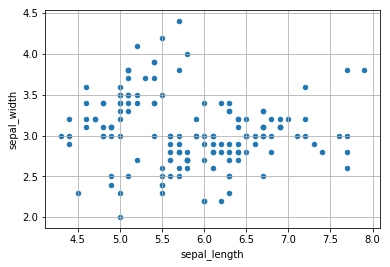

In [10]:
#does not make any sense as we cannot differentiate the species
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')
plt.grid()
plt.show()

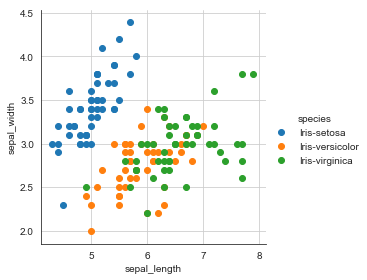

In [12]:
#So, let's color the species to identify them easily
#color coding for species using seaborn
#https://seaborn.pydata.org/generated/seaborn.set_style.html
sb.set_style('white') #sets the color of grids in graph
sb.FacetGrid(iris, hue = 'species', height = 4).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.grid()
plt.show()

#here, we can notice that blue points can be separated(linearly) easily from orange and green colored ones.

#### observation: setosa flowers can be distingushed easily from others using sepal_length and sepal_width

## 3D scatter plot
### need lot of mouse interaction to interpret the data

### Pair Plot
pairwise scatter plot = pair-plot
can be used when the features are high
but can be visualized only in 2D but not in 3D and higher

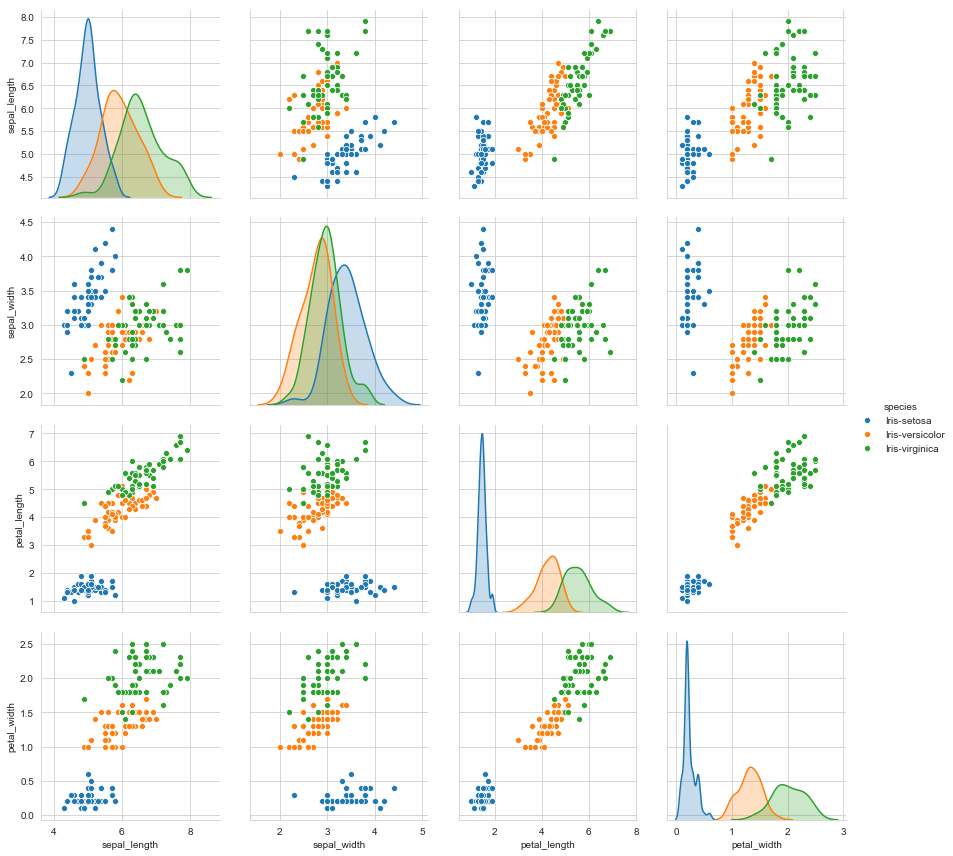

In [13]:
#here we have 4 features, so number of pair plots obtained would be 4C2 = 16
sb.set_style('whitegrid')
sb.pairplot(iris, hue = 'species', height = 3)
plt.grid()
plt.show()

#### observations
petal_length and petal_width are the most useful features
while setosa is separable easily with the other two, versicolor and virginica are almost linearly separable with some overlapping.

## Histogram, PDF, CDF

In [30]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
iris_setosa = iris.loc[iris['species'] == 'Iris-setosa'] 
iris_versicolor = iris.loc[iris['species'] == 'Iris-versicolor']
iris_virginica = iris.loc[iris['species'] == 'Iris-virginica']
#print(type(iris_setosa))
#print(iris_setosa)
#print(iris_setosa['petal_length'])

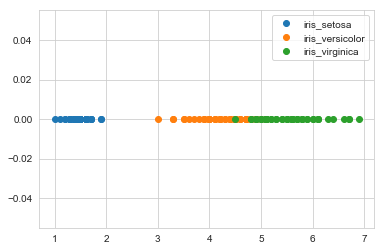

In [33]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
#1D scatter plot
plt.plot(iris_setosa['petal_length'], np.zeros_like(iris_setosa['petal_length']), 'o', label = 'iris_setosa')
plt.plot(iris_versicolor['petal_length'], np.zeros_like(iris_versicolor['petal_length']), 'o', label = 'iris_versicolor')
plt.plot(iris_virginica['petal_length'], np.zeros_like(iris_virginica['petal_length']), 'o', label = 'iris_virginica')
plt.legend()
plt.show()

#### observations
It is hard to interpret the 1D scatter plot as the points are overlapping which makes it difficult to differentiate the species
Instead we can plot a histogram to interpret.
PDF is nothing but smoothing of a histogram

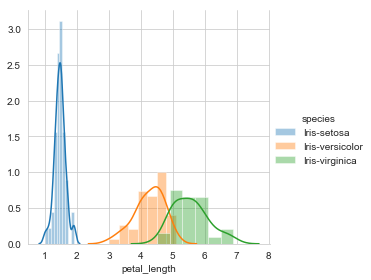

In [34]:
#let's construct histogram for all the features individually using seaborn - distplot
#petal_length histogram
sb.FacetGrid(iris, hue = 'species', height = 4).map(sb.distplot, 'petal_length').add_legend()
plt.show()

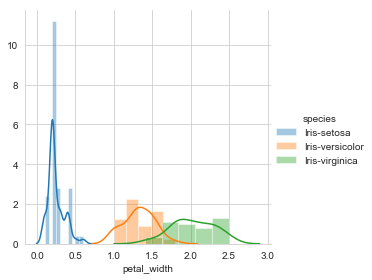

In [35]:
#petal_length histogram
sb.FacetGrid(iris, hue = 'species', height = 4).map(sb.distplot, 'petal_width').add_legend()
plt.show()

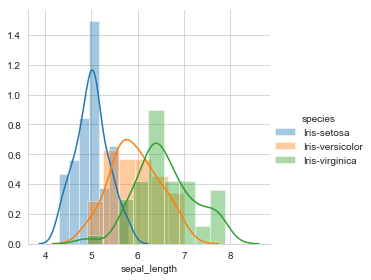

In [36]:
#petal_length histogram
sb.FacetGrid(iris, hue = 'species', height = 4).map(sb.distplot, 'sepal_length').add_legend()
plt.show()

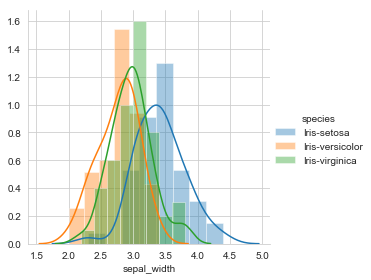

In [37]:
#petal_length histogram
sb.FacetGrid(iris, hue = 'species', height = 4).map(sb.distplot, 'sepal_width').add_legend()
plt.show()

#### observations
petal_length seems to be easier to use for it separates setosa from the other two completely. versicolor and virginica are a bit overlapping

### constructing PDFs and CDFs
we can use CDFs to tell the percentage of the species that fall under some condition

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
1.0
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


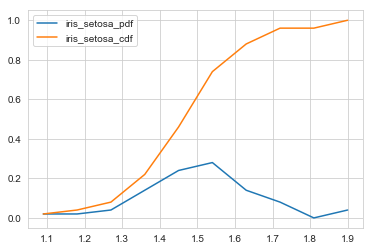

In [44]:
#we use petal_length feature because it is easier to differentiate the species
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density = True)

# bin=10 means it takes in the minimun value and the maximum value of the iris_setosa petal_length and divide them into 10
# intervals with equal width spread.
# counts tells the number of setosa flowers fall in each bin range (including, excluding) 

print(counts)
print(bin_edges)
pdf = counts/sum(counts)
print(pdf)
print(sum(pdf))  #sum(pdf) always sum upto 1.0

cdf = np.cumsum(pdf)
print(cdf)   #the maximum value in cdf is always 1.0


#let's plot pdf and cdf
plt.plot(bin_edges[1:], pdf, label = 'iris_setosa_pdf')
plt.plot(bin_edges[1:], cdf, label = 'iris_setosa_cdf')
plt.legend()
plt.show()

counts of setosa:  [0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
bins of setosa:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
counts of versicolor:  [0.0952381  0.19047619 0.28571429 0.19047619 0.76190476 0.66666667
 0.57142857 0.95238095 0.66666667 0.38095238]
bins of versicolor:  [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
counts of virginica:  [0.08333333 0.41666667 1.         0.33333333 0.75       0.66666667
 0.41666667 0.16666667 0.08333333 0.25      ]
bins of virginica:  [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


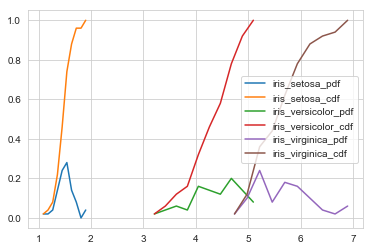

In [46]:
#let's calculate PDF, CDF of petal_length of all the species
#iris_setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density = True)
print('counts of setosa: ', counts)
print('bins of setosa: ', bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'iris_setosa_pdf')
plt.plot(bin_edges[1:], cdf, label = 'iris_setosa_cdf')

#iris_versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins = 10, density = True)
print('counts of versicolor: ', counts)
print('bins of versicolor: ', bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'iris_versicolor_pdf')
plt.plot(bin_edges[1:], cdf, label = 'iris_versicolor_cdf')

#iris_virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins = 10, density = True)
print('counts of virginica: ', counts)
print('bins of virginica: ', bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'iris_virginica_pdf')
plt.plot(bin_edges[1:], cdf, label = 'iris_virginica_cdf')

plt.legend()
plt.show()

## mean, variance and standard deviation

In [52]:
print('Mean:')
print(np.mean(iris_setosa['petal_length']))
print(np.mean(iris_versicolor['petal_length']))
print(np.mean(iris_virginica['petal_length']))

print('\nMean with an outlier example:')
print(np.mean(np.append(iris_setosa['petal_length'], 50)))

print('\nStandard Deviation:')
print(np.std(iris_setosa['petal_length']))
print(np.std(iris_versicolor['petal_length']))
print(np.std(iris_virginica['petal_length']))

Mean:
1.464
4.26
5.552

Mean with an outlier example:
2.4156862745098038

Standard Deviation:
0.17176728442867115
0.4651881339845204
0.5463478745268441


## median, percentile, quantile, IQR, MAD

In [65]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html

#np.arange(start, stop, step) 
#in other words: (including start, excluding stop, step)

print("Medians:")
print(np.median(iris_setosa['petal_length']))
print(np.median(iris_versicolor['petal_length']))
print(np.median(iris_virginica['petal_length']))

print("\nMedian with outlier example:")
print(np.median(np.append(iris_setosa['petal_length'], 50)))

print('\nQuantiles:')
print(np.percentile(iris_setosa['petal_length'], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor['petal_length'], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica['petal_length'], np.arange(0, 100, 25)))

print('\n90th Percentiles:')
print(np.percentile(iris_setosa['petal_length'], 90))
print(np.percentile(iris_versicolor['petal_length'], 90))
print(np.percentile(iris_virginica['petal_length'], 90))

from statsmodels import robust
print('\nMedian Absolute Deviations:')
print(robust.mad(iris_setosa['petal_length']))
print(robust.mad(iris_versicolor['petal_length']))
print(robust.mad(iris_virginica['petal_length']))

#IQR : for example, 75th percentile - 25th percentile gives the range where 50% of the data lies in

Medians:
1.5
4.35
5.55

Median with outlier example:
1.5

Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentiles:
1.7
4.8
6.3100000000000005

Median Absolute Deviations:
0.14826022185056031
0.5189107764769602
0.6671709983275211


## boxplot and whiskers

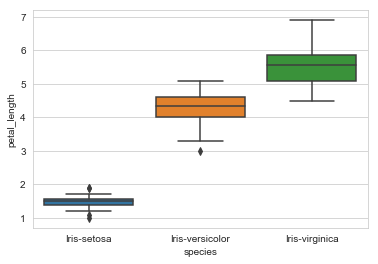

In [68]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

sb.boxplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

## violinplot

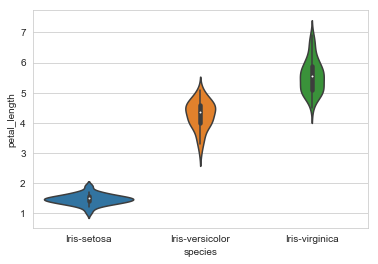

In [70]:
# A violin plot combines the benefits of the previous two plots and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sb.violinplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

univariate analysis: PDF, CDF, boxplot, violinplot
bivariate analysis: pairplot, scatterplot
multivariate analysis: more than two variables - 3D plot

## multivariate probability density, contour plot

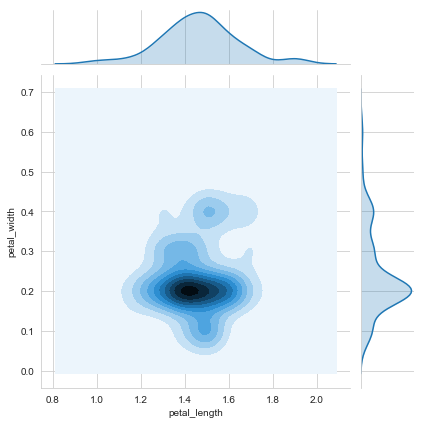

In [73]:
#2D density plot, ocntour plot
sb.jointplot(x = 'petal_length', y = 'petal_width', data = iris_setosa, kind = 'kde')
plt.show()